# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load Data

In [4]:
((X_train, Y_train),(X_test, Y_test)) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

# Preprocessing

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_test.shape

(10000, 784)

In [10]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)

# Build and Train Model

In [12]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer=SGD(), metrics=["accuracy"], loss="categorical_crossentropy")

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [14]:
e = 11
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=e, batch_size=128)

Epoch 1/11
469/469 [==============================] - 2s 3ms/step - loss: 1.9627 - accuracy: 0.5257 - val_loss: 1.6498 - val_accuracy: 0.7239
Epoch 2/11
469/469 [==============================] - 1s 3ms/step - loss: 1.4053 - accuracy: 0.7659 - val_loss: 1.1731 - val_accuracy: 0.8093
Epoch 3/11
469/469 [==============================] - 1s 3ms/step - loss: 1.0183 - accuracy: 0.8283 - val_loss: 0.8756 - val_accuracy: 0.8501
Epoch 4/11
469/469 [==============================] - 1s 3ms/step - loss: 0.7820 - accuracy: 0.8605 - val_loss: 0.6912 - val_accuracy: 0.8775
Epoch 5/11
469/469 [==============================] - 1s 2ms/step - loss: 0.6348 - accuracy: 0.8777 - val_loss: 0.5740 - val_accuracy: 0.8909
Epoch 6/11
469/469 [==============================] - 1s 3ms/step - loss: 0.5386 - accuracy: 0.8906 - val_loss: 0.4980 - val_accuracy: 0.8990
Epoch 7/11
469/469 [==============================] - 1s 3ms/step - loss: 0.4728 - accuracy: 0.8978 - val_loss: 0.4402 - val_accuracy: 0.9052
Epoch 

In [15]:
Y_pred = model.predict(X_test, batch_size=128)

79/79 [==============================] - 0s 1ms/step


In [16]:
print(
    classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.91      0.94      0.93       982
           5       0.87      0.86      0.87       892
           6       0.94      0.93      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Plot Training Loss and Accuracy

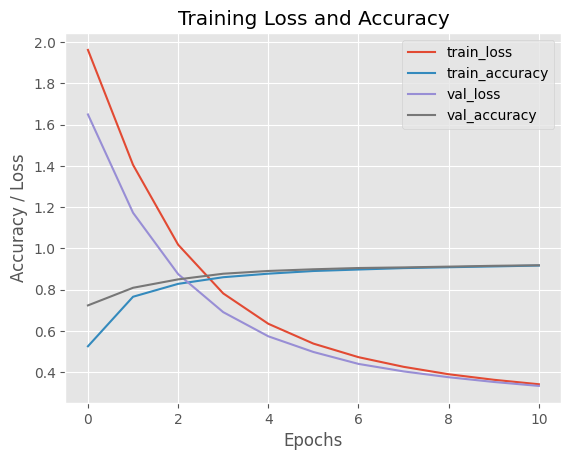

In [18]:
plt.style.use("ggplot")
plt.plot(arange(0,e), H.history["loss"], label="train_loss")
plt.plot(arange(0,e), H.history["accuracy"], label="train_accuracy")
plt.plot(arange(0,e), H.history["val_loss"], label="val_loss")
plt.plot(arange(0,e), H.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy / Loss")
plt.title("Training Loss and Accuracy")
plt.legend()